# Project 3 Part 1

## Topic 1) Comparing Police Districts

Which district had the most crimes in 2022? District 8 had the most crimes in 2022 (14,805 crimes).

Which had the least? District 31 had the least crimes in 2022 (15 crimes).

## Topic 4) Comparing Months

​What months have the most crime? July has the most crimes (717,232 crimes).

What months have the least? February has the least crimes (529,391 crimes).

Are there any individual crimes that do not follow this pattern? If so, which crimes?

## Topic 5) Comparing Holidays

What are the top 3 holidays with the largest number of crime?

For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

### Imports

In [2]:
# import packages
import pandas as pd
import glob
# import holidays
import datetime as dt
from holidays import country_holidays
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import calendar

In [3]:
# import data
# https://sparkbyexamples.com/pandas/pandas-read-multiple-csv-files/

# Get CSV files list from a folder
path = 'Data'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df  = pd.concat(df_list, ignore_index=True)

In [4]:
# preview df
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [42]:
# convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# change Primary Type name to Crime
df = df.rename(columns={'Primary Type': 'Crime'})

# verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 01:00:00 to 2022-12-31 12:59:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Crime                 object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


### Topic 1

In [21]:

# set Date column as index
df = df.set_index('Date')

# verify change
df.head()

,ID,Crime,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [28]:
# filter for data from 2022 only
df_22 = df.loc['2022']

# verify change
df_22.head()

,ID,Crime,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2022-01-01 13:00:00,12582293,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060
2022-01-01 13:00:00,12607313,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,23.0,41.787923,-87.769446
2022-01-01 01:00:00,12585671,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120
2022-01-01 01:00:00,12592889,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147
2022-01-01 01:00:00,12584977,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,2.0,41.910818,-87.654560


In [29]:
# use value_counts() to get district with highest and lowest # of crimes in 2022
df_22['District'].value_counts().sort_values(ascending=False)

8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
Name: District, dtype: int64

### Topic 4

In [45]:
# drop unnecessary columns
df_new = df[['Crime']]
df_new.head()

,Crime
Date,
2001-01-01 01:00:00,BATTERY
2001-01-01 13:00:00,BATTERY
2001-01-01 13:00:00,GAMBLING
2001-01-01 01:00:00,CRIMINAL DAMAGE
2001-01-01 01:00:00,BATTERY


In [48]:
# save date as column with no time
df_new['Date'] = df.index.date

C:\Users\eliud\AppData\Local\Temp\ipykernel_11668\2490763595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df.index.date


In [49]:
# verify change
df_new.head()

,Crime,Date
Date,,
2001-01-01 01:00:00,BATTERY,2001-01-01
2001-01-01 13:00:00,BATTERY,2001-01-01
2001-01-01 13:00:00,GAMBLING,2001-01-01
2001-01-01 01:00:00,CRIMINAL DAMAGE,2001-01-01
2001-01-01 01:00:00,BATTERY,2001-01-01


In [50]:
# create MonthName column from index
df_new['MonthName'] = df.index.month_name()

C:\Users\eliud\AppData\Local\Temp\ipykernel_11668\2742131539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['MonthName'] = df.index.month_name()


In [52]:
# rename MonthName column to Month
df_new = df_new.rename(columns={'MonthName': 'Month'})

In [53]:
# verify change
df_new.head()

,Crime,Date,Month
Date,,,
2001-01-01 01:00:00,BATTERY,2001-01-01,January
2001-01-01 13:00:00,BATTERY,2001-01-01,January
2001-01-01 13:00:00,GAMBLING,2001-01-01,January
2001-01-01 01:00:00,CRIMINAL DAMAGE,2001-01-01,January
2001-01-01 01:00:00,BATTERY,2001-01-01,January


In [56]:
# create dictionary to keep track of months by number

month_lookup = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [76]:
# create dictionary to keep track of crimes by number
df_new['Crime'].value_counts()

THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING

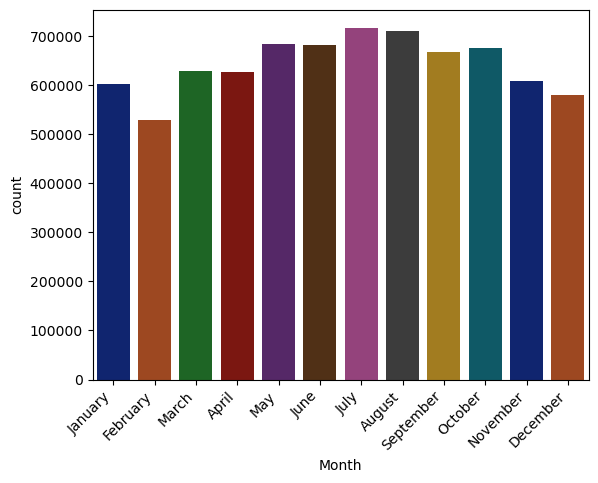

In [59]:
# make countplot by month
ax = sns.countplot(data=df_new, x='Month',palette='dark',order=month_lookup.values());

# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [54]:
# verify which month has most crimes and which month has least
df_new['Month'].value_counts()

July         717232
August       710444
May          682932
June         681739
October      676285
September    668242
March        629704
April        627175
November     608961
January      601236
December     579768
February     529391
Name: Month, dtype: int64

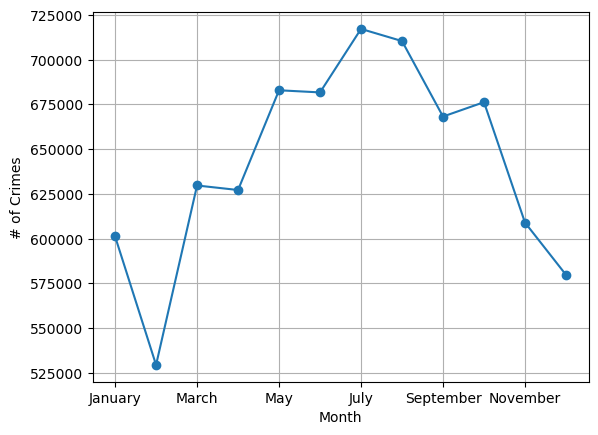

In [78]:
# view individual crimes per month to see if it follows overall monthly pattern

## save month counts
month_counts = df_new['Month'].value_counts()[month_lookup.values()]


# plot crimes per month

# how do I conver this to specific crimes per month?
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

In [83]:
# create list of unique crime descriptions
crime_list = df_new['Crime'].unique()

# view list
crime_list

array(['BATTERY', 'GAMBLING', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'THEFT', 'ASSAULT', 'NARCOTICS',
       'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'WEAPONS VIOLATION',
       'OTHER OFFENSE', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE', 'BURGLARY',
       'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'ROBBERY',
       'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING',
       'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [131]:
# create empty dictionary to save new time series crime columns
CRIMES = {}

# loop through list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df_new.loc[ df_new['Crime']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("D").size().to_frame()
   temp_res['month'] = temp_res.index.month
   
   temp_res = temp_res.groupby('month').sum()[0]
   #display(temp_res)
   # display(temp_res.head(3))
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 

crimes_df = pd.DataFrame(CRIMES)

In [127]:
# for crime in CRIMES.keys():
#     plt.plot(CRIMES[crime])
#     plt.title(crime)
#     plt.show()

In [132]:
# # loop through list of crimes
# for crime in crime_list:
#     # I. Save a temp df of just the rows that match the crime
#    temp = df_new.loc[ df_new['Crime']==crime].copy()
#     # II. Resample the temp DataFrame as Daily data (crime counts) 
#     # and keep ONLY the .size() 
#    temp_res = temp.resample("D").size()
#    temp_res['month'] = temp_res.index.month
#    temp_res = temp_res.groupby('month').sum()
#    #III. Save the temporary DataFrame in the dictionary,
#    #using the crime description as the key.
#    CRIMES[crime] = temp_res.copy() 
# CRIMES.keys()

In [87]:
# Convert Dict to df
crimes_df = pd.DataFrame(CRIMES)
crimes_df

,BATTERY,GAMBLING,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,THEFT,ASSAULT,NARCOTICS,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,WEAPONS VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,296,2.0,233,100,412,70,97,38.0,94,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,143,1.0,118,4,221,66,175,2.0,78,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,165,0.0,136,3,226,79,133,7.0,49,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,173,2.0,133,5,243,57,142,2.0,42,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,178,0.0,142,9,265,68,185,6.0,53,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,76,NaN,64,4,147,47,9,NaN,40,12,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2022-12-28,102,NaN,78,3,112,44,12,NaN,38,17,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2022-12-29,97,NaN,95,3,137,38,15,NaN,38,11,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [88]:
# save new df
crimes_df.to_csv("chicago_crime_counts_01-22.csv")

In [91]:
# view null values
crimes_df.isna().sum().sum()

27731

In [92]:
# fill null values with 0s
crimes_df = crimes_df.fillna(0)

# verify change
crimes_df.isna().sum()

BATTERY                              0
GAMBLING                             0
CRIMINAL DAMAGE                      0
OFFENSE INVOLVING CHILDREN           0
THEFT                                0
ASSAULT                              0
NARCOTICS                            0
CRIM SEXUAL ASSAULT                  0
DECEPTIVE PRACTICE                   0
WEAPONS VIOLATION                    0
OTHER OFFENSE                        0
MOTOR VEHICLE THEFT                  0
SEX OFFENSE                          0
BURGLARY                             0
PUBLIC PEACE VIOLATION               0
LIQUOR LAW VIOLATION                 0
ROBBERY                              0
CRIMINAL TRESPASS                    0
INTERFERENCE WITH PUBLIC OFFICER     0
HOMICIDE                             0
KIDNAPPING                           0
PROSTITUTION                         0
STALKING                             0
INTIMIDATION                         0
CRIMINAL SEXUAL ASSAULT              0
ARSON                    

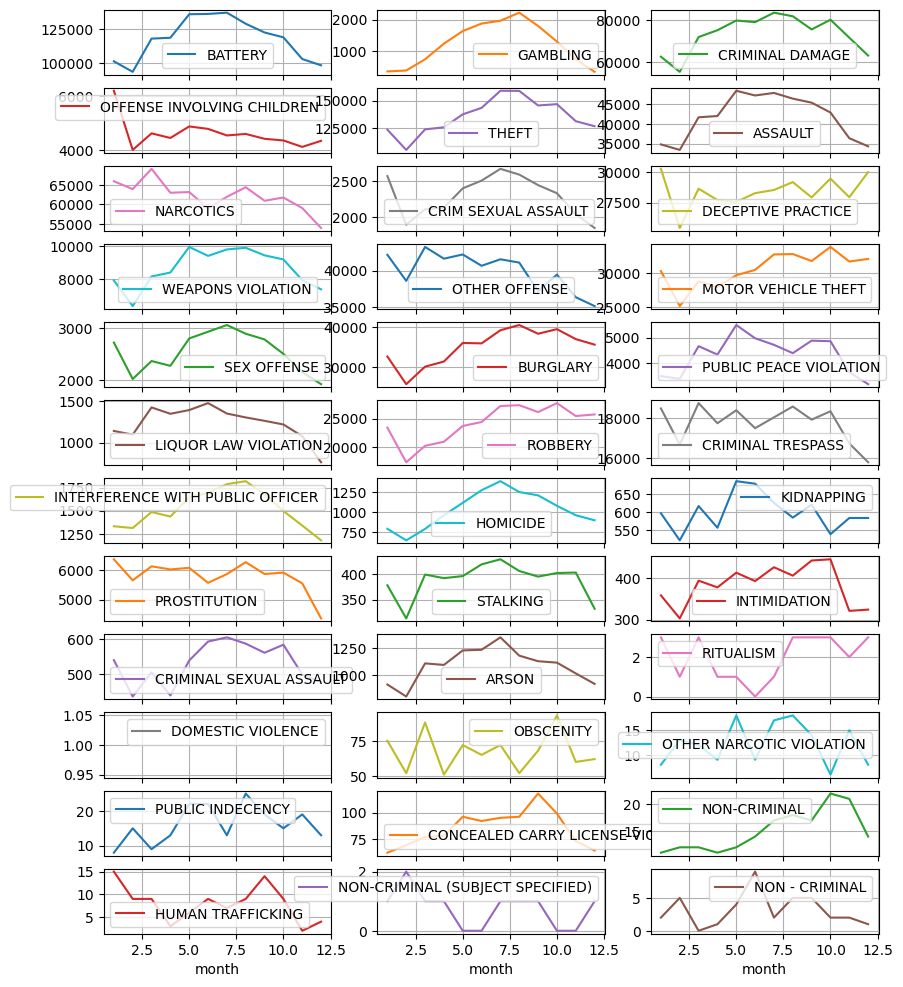

In [134]:
crimes_df.plot(subplots=True, figsize=(10,12),grid=True, layout=(12,3));
# plt.tight_layout()

In [136]:
df_monthly = df_new.copy()

In [139]:
df_monthly['month'] = df_monthly.index.month

In [143]:
df_monthly.head(3)

,Crime,Date,Month,month
Date,,,,
2001-01-01 01:00:00,BATTERY,2001-01-01,January,1
2001-01-01 13:00:00,BATTERY,2001-01-01,January,1
2001-01-01 13:00:00,GAMBLING,2001-01-01,January,1


In [148]:
df_monthly_crimes = df_monthly.groupby(['month', 'Crime']).size().to_frame().unstack()

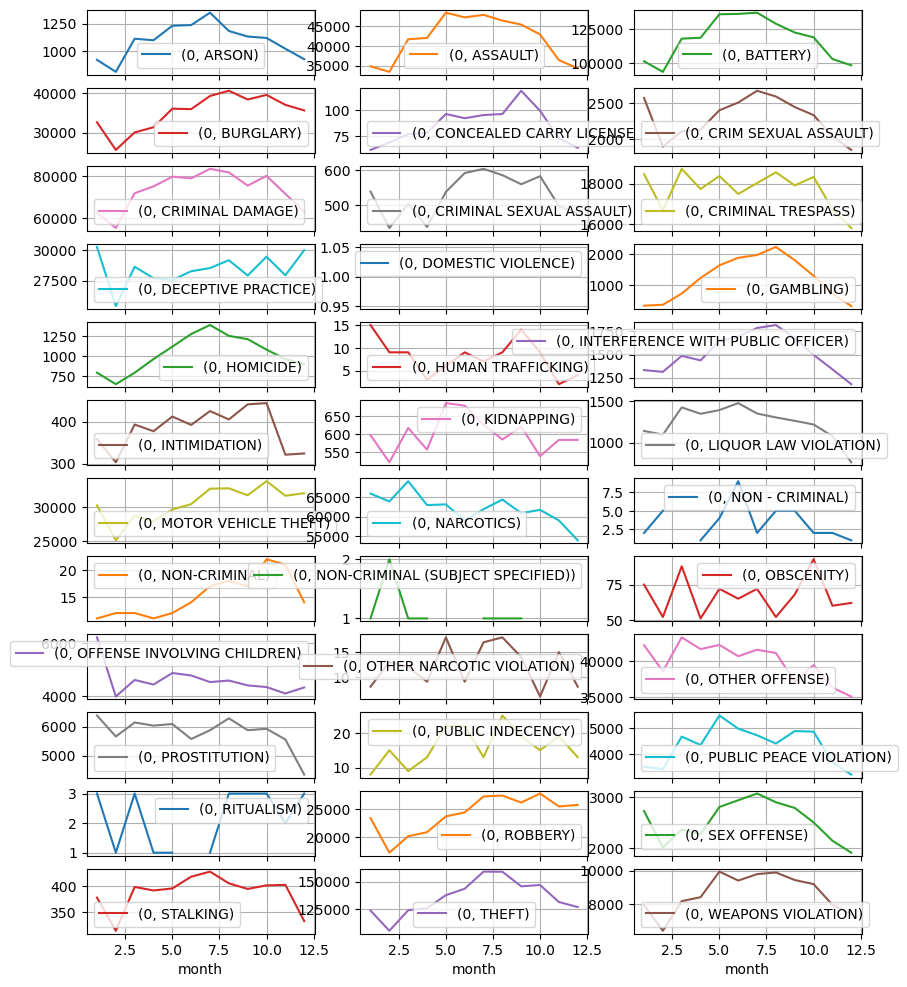

In [150]:
df_monthly_crimes.plot(subplots=True, figsize=(10,12),grid=True, layout=(12,3));